In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from plotting import plot_utils, summary_plots, load_fits, plot_prf_params
plot_utils.set_all_font_sizes(20)
from utils import roi_utils, default_paths, stats_utils, nsd_utils

In [2]:
# Load results of the fitting procedure

subjects=np.arange(1,9)
n_subjects = len(subjects)

fitting_type = 'full_midlevel_plus_alexnet_best_layer_pca'

out = [load_fits.load_fit_results(subject=ss, fitting_type=fitting_type, n_from_end=0, verbose=False) \
       for ss in subjects]
fig_save_folder=None

# initialize roi_def objects to get roi indices
roi_def = roi_utils.multi_subject_roi_def(subjects)
roi_names =roi_def.roi_names
n_rois = roi_def.n_rois


In [3]:
for ii in range(n_subjects):
    print(out[ii]['voxel_subset_is_done_val'])

[ True  True  True  True  True]
[ True  True  True  True  True]
[ True  True  True  True  True]
[ True  True  True  True  True]
[ True  True  True  True  True]
[ True  True  True  True  True]
[ True  True  True  True  True]
[ True  True  True  True  True]


In [4]:
for ii in range(n_subjects):
    print(out[ii]['voxel_subset_is_done_trn'])

[ True  True  True  True  True]
[ True  True  True  True  True]
[ True  True  True  True  True]
[ True  True  True  True  True]
[ True  True  True  True  True]
[ True  True  True  True  True]
[ True  True  True  True  True]
[ True  True  True  True  True]


leave_out_alexnet
just_alexnet


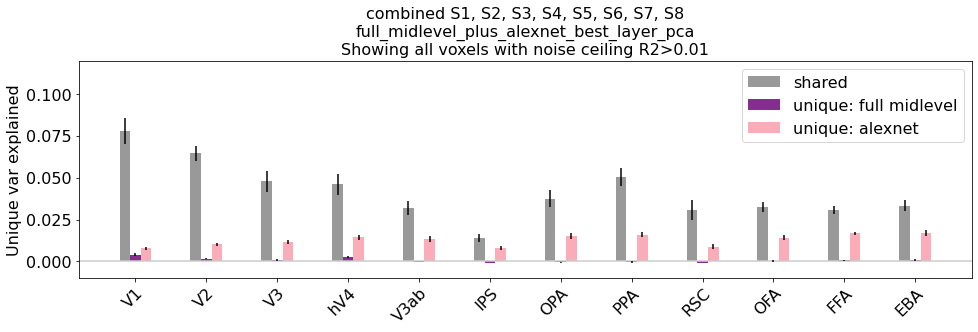

In [10]:
# Make a barplot for variance partition across all ROIs and subjects
roi_names =roi_def.roi_names
nc_thresh = 0.01

pp0 = 0
pp1 = 12
pp2 = 11
print(np.array(out[0]['partial_version_names'][pp1]))
print(np.array(out[0]['partial_version_names'][pp2]))
name1 = 'full midlevel'
name2 = 'alexnet'

ve_names = ['shared', 'unique: ' + name1, 'unique: ' + name2]

gray_color = np.array([[0.6, 0.6, 0.6, 1]])
alexnet_color = cm.RdPu(np.linspace(0,1,4))[1:2,:]
midlevel_color = cm.BuPu(np.linspace(0,1,6))[4:5,:]
# combined_color = np.array([[0.4, 0.4, 0.4, 1]])

colors = np.concatenate([gray_color, midlevel_color, alexnet_color], axis=0)

vals = np.zeros((n_subjects, n_rois, 3))

for si, ss in enumerate(subjects):
    
    val_r2 = out[si]['val_r2']    
    nc = nsd_utils.ncsnr_to_nc(out[si]['voxel_ncsnr'][out[si]['voxel_mask']])/100
    inds2use = nc>nc_thresh
    shared_ab, unique_a, unique_b = stats_utils.get_shared_unique_var(val_r2[:,pp0], \
                                                                  val_r2[:,pp1], \
                                                                  val_r2[:,pp2])
    var_expl = np.array([shared_ab, unique_a, unique_b]).T

    for ri in range(n_rois):
        
        inds_this_roi = roi_def.ss_roi_defs[si].get_indices(ri) & inds2use
        if np.sum(inds_this_roi)==0:
            print('subj %d %s has no voxels'%(ss, roi_names[ri]))
            vals[si,ri,:] = np.nan
        vals[si,ri,:] = np.mean(var_expl[inds_this_roi,:], axis=0)
        
mean_vals = np.mean(vals, axis=0)
sem_vals = np.std(vals, axis=0) / np.sqrt(n_subjects)

legend_separate=True
title='%s\n%s\nShowing all voxels with noise ceiling R2>%.2f'%(summary_plots.get_substr(out), \
                                                                       fitting_type, nc_thresh)

plt.rcParams['pdf.fonttype']=42
plot_utils.set_all_font_sizes(fs = 16)
bw = 0.15;
space = (1 - (bw*mean_vals.shape[1]))/2
fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, colors=colors, space=space, \
                xticklabels=roi_names, ylabel='Unique var explained', \
                ylim=[-0.01, 0.12], title=title, horizontal_line_pos=0,\
                legend_labels=ve_names, \
                legend_overlaid=True, legend_separate=False, \
                fig_size=(16,4))

fn2save = '/user_data/mmhender/imStat/figures/variance_partition_midlevel_alexnet.pdf'
plt.savefig(fn2save)

leave_out_alexnet
just_alexnet


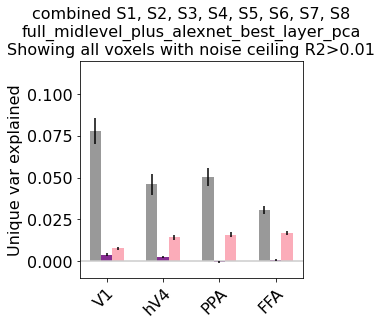

In [14]:
# Make a barplot for variance partition across all ROIs and subjects
roi_names =roi_def.roi_names
nc_thresh = 0.01

rois_plot = [0,3,7,10];

pp0 = 0
pp1 = 12
pp2 = 11
print(np.array(out[0]['partial_version_names'][pp1]))
print(np.array(out[0]['partial_version_names'][pp2]))
name1 = 'full midlevel'
name2 = 'alexnet'

ve_names = ['shared', 'unique: ' + name1, 'unique: ' + name2]

gray_color = np.array([[0.6, 0.6, 0.6, 1]])
alexnet_color = cm.RdPu(np.linspace(0,1,4))[1:2,:]
midlevel_color = cm.BuPu(np.linspace(0,1,6))[4:5,:]
# combined_color = np.array([[0.4, 0.4, 0.4, 1]])

colors = np.concatenate([gray_color, midlevel_color, alexnet_color], axis=0)

vals = np.zeros((n_subjects, len(rois_plot), 3))

for si, ss in enumerate(subjects):
    
    val_r2 = out[si]['val_r2']    
    nc = nsd_utils.ncsnr_to_nc(out[si]['voxel_ncsnr'][out[si]['voxel_mask']])/100
    inds2use = nc>nc_thresh
    shared_ab, unique_a, unique_b = stats_utils.get_shared_unique_var(val_r2[:,pp0], \
                                                                  val_r2[:,pp1], \
                                                                  val_r2[:,pp2])
    var_expl = np.array([shared_ab, unique_a, unique_b]).T

    for ri,rr in enumerate(rois_plot):
        
        inds_this_roi = roi_def.ss_roi_defs[si].get_indices(rr) & inds2use
        if np.sum(inds_this_roi)==0:
            print('subj %d %s has no voxels'%(ss, roi_names[rr]))
            vals[si,ri,:] = np.nan
        vals[si,ri,:] = np.mean(var_expl[inds_this_roi,:], axis=0)
        
mean_vals = np.mean(vals, axis=0)
sem_vals = np.std(vals, axis=0) / np.sqrt(n_subjects)

legend_separate=True
title='%s\n%s\nShowing all voxels with noise ceiling R2>%.2f'%(summary_plots.get_substr(out), \
                                                                       fitting_type, nc_thresh)

plt.rcParams['pdf.fonttype']=42
plot_utils.set_all_font_sizes(fs = 16)
bw = 0.20;
space = (1 - (bw*mean_vals.shape[1]))/2
fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, colors=colors, space=space, \
                xticklabels=np.array(roi_names)[rois_plot], ylabel='Unique var explained', \
                ylim=[-0.01, 0.12], title=title, horizontal_line_pos=0,\
                legend_labels=ve_names, \
                legend_overlaid=False, legend_separate=False, \
                fig_size=(4,4))

fn2save = '/user_data/mmhender/imStat/figures/variance_partition_midlevel_alexnet_small.pdf'
plt.savefig(fn2save)

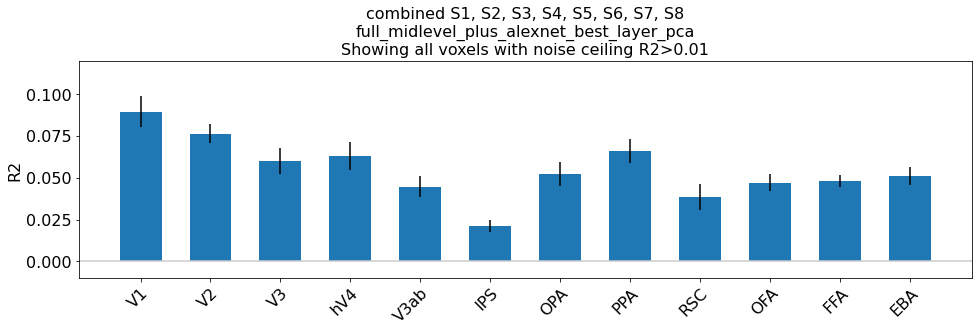

In [9]:
summary_plots.barplot_R2_all(fitting_type, out, roi_def, ylims=[-0.01, 0.12])

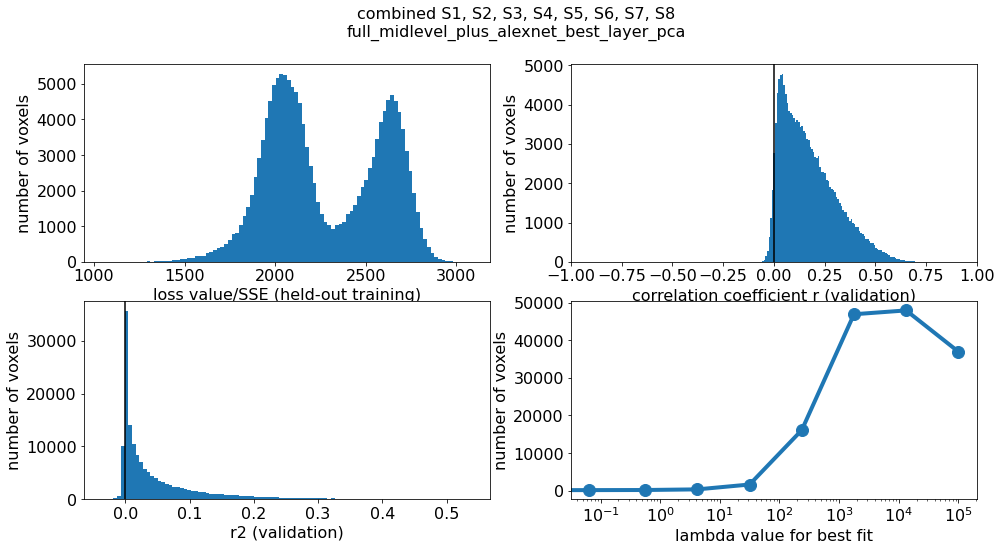

In [12]:
summary_plots.plot_perf_summary(fitting_type, out)

In [12]:
np.array(out[0]['partial_version_names'])

array(['full_combined_model', 'just_gabor_solo', 'leave_out_gabor_solo',
       'just_pyramid_texture', 'leave_out_pyramid_texture',
       'pyramid_texture_just_lower-level_no_other_modules',
       'pyramid_texture_just_higher-level_no_other_modules',
       'pyramid_texture_just_lower-level_plus_other_modules',
       'pyramid_texture_just_higher-level_plus_other_modules',
       'just_sketch_tokens', 'leave_out_sketch_tokens', 'just_alexnet',
       'leave_out_alexnet'], dtype='<U52')

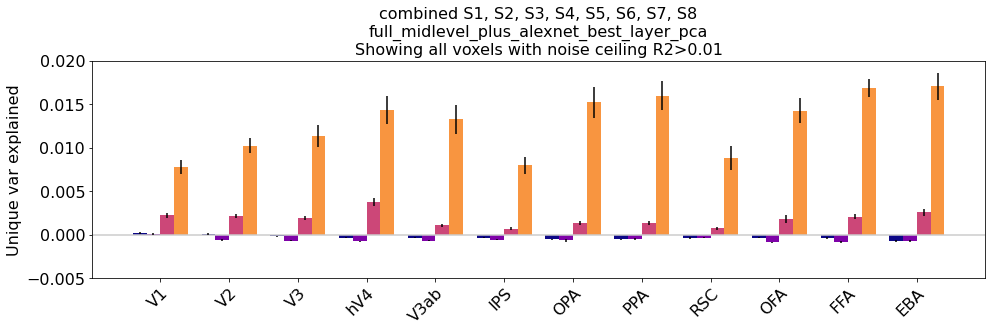

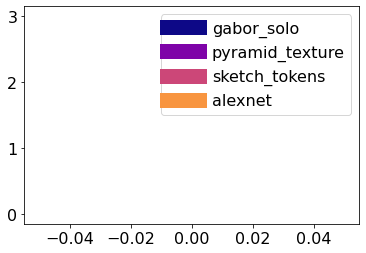

In [14]:
# Make a barplot for variance partition across all ROIs and subjects
roi_names =roi_def.roi_names
nc_thresh = 0.01

# each of these indices is one feature set left out at a time.
ppinds = [2,4,10,12]
ve_names = [out[0]['partial_version_names'][pp].split('leave_out_')[1] for pp in ppinds]

colors = cm.plasma(np.linspace(0,1,5))

vals = np.zeros((n_subjects, n_rois, 4))

for si, ss in enumerate(subjects):
    
    val_r2 = out[si]['val_r2']    
    nc = nsd_utils.ncsnr_to_nc(out[si]['voxel_ncsnr'][out[si]['voxel_mask']])/100
    inds2use = nc>nc_thresh
    
    var_expl = np.tile(val_r2[:,0:1], [1,4]) - val_r2[:,ppinds]

    for ri in range(n_rois):
        
        inds_this_roi = roi_def.ss_roi_defs[si].get_indices(ri) & inds2use
        if np.sum(inds_this_roi)==0:
            print('subj %d %s has no voxels'%(ss, roi_names[ri]))
            vals[si,ri,:] = np.nan
        vals[si,ri,:] = np.mean(var_expl[inds_this_roi,:], axis=0)
        
mean_vals = np.mean(vals, axis=0)
sem_vals = np.std(vals, axis=0) / np.sqrt(n_subjects)

legend_separate=True
title='%s\n%s\nShowing all voxels with noise ceiling R2>%.2f'%(summary_plots.get_substr(out), \
                                                                       fitting_type, nc_thresh)

plot_utils.set_all_font_sizes(fs = 16)
fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, colors=colors, space=0.1, \
                xticklabels=roi_names, ylabel='Unique var explained', \
                ylim=[-0.005, 0.020], title=title, horizontal_line_pos=0,\
                legend_labels=ve_names, \
                legend_overlaid=False, legend_separate=legend_separate, \
                fig_size=(16,4))
